<h1 style="text-align:center;">Méthodes d'Analyse de Régression dans R</h1>

<u>**Auteur</u> :** [Younes Dahami](https://www.linkedin.com/in/dahami/)

[Les Tableaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Tableaux%20en%20R) et [Les Concepts Statistiques Fondamentaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Les%20Concepts%20Statistiques%20Fondamentaux%20dans%20R)

# Introduction

Les méthodes de régression constituent l'ossature de nombreuses analyses en recherche. En général, ces méthodes sont utilisées pour estimer les associations entre les variables, notamment lorsque l'une ou plusieurs de ces variables sont continues. Dans ce sujet, nous couvrons la **régression linéaire**, la **régression logistique** et les **modèles mixtes.** Pour la plupart des personnes, la compréhension de ces méthodes sera suffisante pour les analyses requises dans leur recherche. Étant donné que ces méthodes sont si souvent utilisées, elles sont couvertes en détail. La motivation statistique derrière ces méthodes et leur implémentation dans R sur des données sont toutes deux couvertes, et comprendre ces deux concepts est essentiel lors de la réalisation de nos analyses. De plus, la terminologie est introduite pour aider à normaliser le langage utilisé avec ces concepts à travers le réseau IBIS (Infant Brain Imaging Study). L'ensemble des données transversales est utilisé pour illustrer ces concepts tout au long de ce notebook.


In [4]:
library(ggplot2)
library(tidyverse)

In [19]:
data_complete <- read.csv("Cross-sec_full.csv", stringsAsFactors = FALSE, na.strings = c(" ", "","."))
head(data_complete)

,Identifiers,SSM_ASD_v24,V24.demographics.Risk,GROUP,Study_Site,Gender,V06.aosi.Candidate_Age,V12.aosi.Candidate_Age,V06.aosi.total_score_1_18,V12.aosi.total_score_1_18,⋯,V06.mullen.Candidate_Age,V12.mullen.Candidate_Age,V36.mullen.cognitive_t_score_sum,V24.mullen.cognitive_t_score_sum,V06.mullen.cognitive_t_score_sum,V12.mullen.cognitive_t_score_sum,V36.mullen.composite_standard_score,V24.mullen.composite_standard_score,V06.mullen.composite_standard_score,V12.mullen.composite_standard_score
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,YES_ASD,HR,HR_ASD,PHI,Male,7.1,12.5,8,3,⋯,7.1,12.5,153,123,179,172,77,65,90,86
2,2,YES_ASD,HR,HR_ASD,PHI,Male,6.1,12.4,18,10,⋯,6.1,12.4,110,124,170,124,59,65,85,65
3,3,YES_ASD,HR,HR_ASD,PHI,Male,6.6,12.9,4,2,⋯,6.6,12.9,117,134,183,219,62,69,92,110
4,4,YES_ASD,HR,HR_ASD,PHI,Male,NA,12.7,NA,3,⋯,NA,12.7,152,107,NA,219,77,58,NA,110
5,5,NO_ASD,HR,HR_neg,PHI,Male,6.8,NA,6,NA,⋯,6.8,NA,226,173,226,NA,113,87,113,NA
6,6,NO_ASD,HR,HR_neg,PHI,Male,NA,12.1,NA,4,⋯,NA,12.1,184,196,NA,155,92,98,NA,78


In [20]:
colnames(data_complete)

[1] "Identifiers"                         "SSM_ASD_v24"                        
 [3] "V24.demographics.Risk"               "GROUP"                              
 [5] "Study_Site"                          "Gender"                             
 [7] "V06.aosi.Candidate_Age"              "V12.aosi.Candidate_Age"             
 [9] "V06.aosi.total_score_1_18"           "V12.aosi.total_score_1_18"          
[11] "V36.mullen.Candidate_Age"            "V24.mullen.Candidate_Age"           
[13] "V06.mullen.Candidate_Age"            "V12.mullen.Candidate_Age"           
[15] "V36.mullen.cognitive_t_score_sum"    "V24.mullen.cognitive_t_score_sum"   
[17] "V06.mullen.cognitive_t_score_sum"    "V12.mullen.cognitive_t_score_sum"   
[19] "V36.mullen.composite_standard_score" "V24.mullen.composite_standard_score"
[21] "V06.mullen.composite_standard_score" "V12.mullen.composite_standard_score"

# 1) Régression Linéaire

## 1.1) Motivation

Supposons que nous nous intéressions à l'association entre le score composite Mullen (enregistré comme un score standard dans l'ensemble de données) et la sévérité de l'autisme telle que mesurée par l'AOSI, chez les enfants à 12 mois `V12.mullen.composite_standard_score` et `V12.aosi.total_score_1_18`. Étant donné que les deux sont des variables continues, une mesure simple de cette association est leur corrélation. Regardons le graphique de dispersion pour ces deux variables.


Warning message:
"Removed 75 rows containing missing values or values outside the scale range (`geom_point()`)."


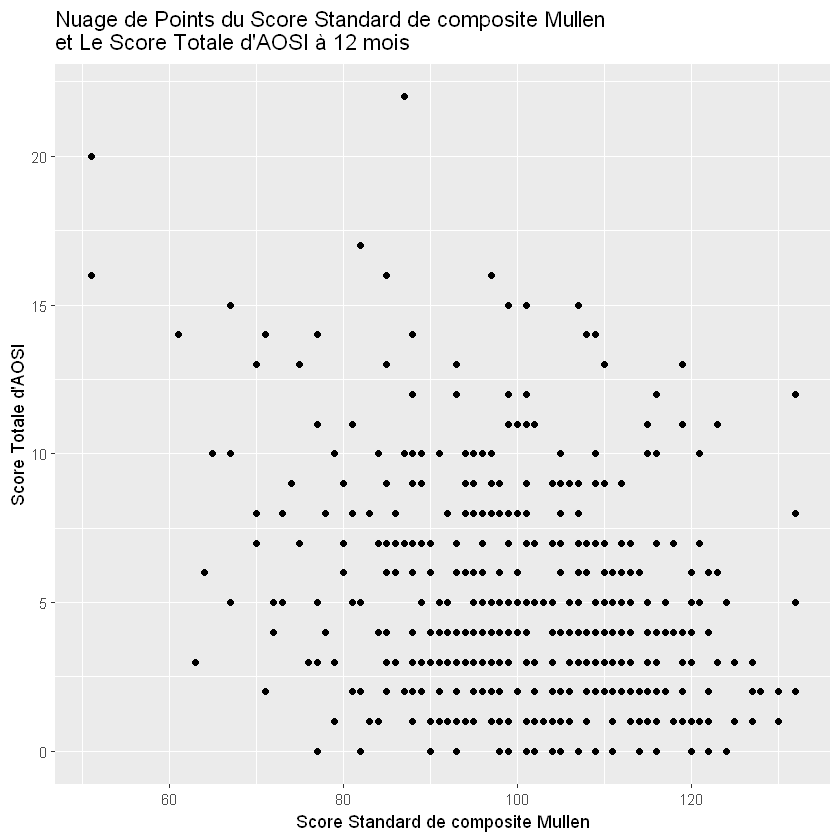

In [22]:
ggplot(data = data_complete, aes(x= V12.mullen.composite_standard_score, y=V12.aosi.total_score_1_18))+
    geom_point()+
    labs(x="Score Standard de composite Mullen",
         y= "Score Totale d'AOSI",
         title = "Nuage de Points du Score Standard de composite Mullen \net Le Score Totale d'AOSI à 12 mois")

`\n` est utilisé lors de la spécification du titre. Si cela n'est pas inclus, R forcera l'ensemble de la chaine sur une seule ligne, coupant une partie du titre en raison du manque d'espace. Ajouter `\n` force un saut de ligne à cet endroit. Cette chaine `\n` spécifie une nouvelle ligne pour n'importe quelle chaine générale (elle peut être utilisée avec les étiquettes des axes, le titre de la légende, les légendes ou sous-titres, etc.).


Au mieux, il semble y avoir une relation faible et négative entre ces variables.

Estimons la **corrélation.** Cela peut être fait en R en utilisant **`cor()`.** Remarquons que `cor()` n'a pas d'argument `data=`, donc nous devons spécifier les variables d'intérêt sous la forme `dataset$variable`. De plus, par défaut, si l'une des variables comporte des valeurs manquantes, un NA est renvoyé par `cor()`. Pour exclure tout sujet dont une ou plusieurs des variables manquent du calcul, spécifions **`use="pairwise.complete"`** comme argument dans la fonction. Nous pouvons également :

**1)** mener un test d'hypothèse formel pour une corrélation nulle

**2)** calculer un intervalle de confiance à $95\%$ pour la corrélation en utilisant la fonction **`cor.test()`.**

Remarquons que la mesure de corrélation par défaut est **Pearson,** bien que cela puisse être modifié dans les deux fonctions en utilisant l'argument **`measure=`**. De plus, lors de la réalisation du test d'hypothèse ou du calcul de l'intervalle de confiance, nous devons toujours prendre en compte toutes les hypothèses de distribution qui sont utilisées dans ces calculs (comme discuté dans [Les Tableaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Tableaux%20en%20R) et [Les Concepts Statistiques Fondamentaux dans R](https://github.com/Dahamey/R/tree/main/R%20%20-%20Fr/Les%20Concepts%20Statistiques%20Fondamentaux%20dans%20R)).

Pour que le test d'hypothèse et les calculs de l'intervalle de confiance effectués ici soient valides, l'une des conditions (assumptions) suivantes doit être remplie :

**1)** les deux variables sont conjointement distribuées normalement.

**2)** ou bien la taille de l'échantillon est suffisamment grande pour que la distribution approximative de la statistique de test soit précise. Cette distribution approximative est une distribution $t$ avec $n-2$ degrés de liberté, où $n$ représente la taille de l'échantillon. Par conséquent, la valeur de la statistique de test dans la sortie R est notée $t.$


In [23]:
cor(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18)

[1] NA

In [24]:
cor(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18,
   use = "pairwise.complete")

[1] -0.2964536

In [30]:
# effectuons un test d'hypothèse
resultats <- cor.test(x = data_complete$V12.mullen.composite_standard_score, y = data_complete$V12.aosi.total_score_1_18)
resultats


	Pearson's product-moment correlation

data:  data_complete$V12.mullen.composite_standard_score and data_complete$V12.aosi.total_score_1_18
t = -7.01, df = 510, p-value = 7.59e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3735142 -0.2153293
sample estimates:
       cor 
-0.2964536 


Nous constatons qu'il y a des preuves (p-value = 7.59e-12 < 0.05) d'une corrélation modérée et négative entre ces variables.

Cependant, l'utilisation de cette corrélation par paire présente ses limites car :

**1)** c'est une mesure plus "générale"

**2)** elle ne tient pas compte d'autres variables qui pourraient influencer cette association.

Pour mieux illustrer le premier point, considérons les diagrammes de dispersion suivants (créés à l'aide de données simulées).


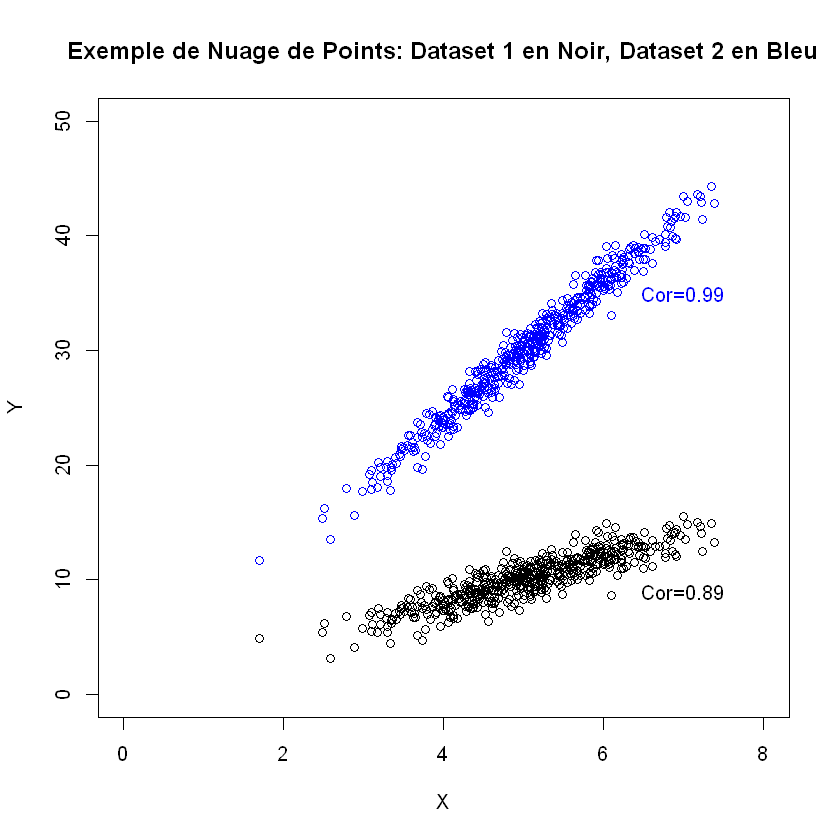

In [40]:
# simuler les données
set.seed(25101989)
E <- rnorm(500)
X <- rnorm(500, mean=5)
Y1 <- 2*X+E
Y2 <- 6*X+E

# nous utiliserons les fonctions de tracé par défaut de R (plot)
plot(X, Y1, main="Exemple de Nuage de Points: Dataset 1 en Noir, Dataset 2 en Bleu", xlim = c(0, 8), ylim=c(0, 50), ylab="Y")
points(X, Y2, col="blue")
text(x=7, y=9,labels=paste("Cor=",round(cor(X, Y1),2),sep=""))
text(x=7, y=35,labels=paste("Cor=",round(cor(X, Y2),2),sep=""), col="blue")

In [42]:
cor(X, Y1)

[1] 0.885667

In [43]:
cor(X, Y2)

[1] 0.9854266

Nous pouvons voir que les deux exemples ont une corrélation similaire, bien que l'ensemble de données représenté en bleu ait une augmentation beaucoup plus importante de la variable $Y$ lorsque la variable $X$ augmente. Il serait utile de mesurer plus explicitement ces **pentes** et d'ajuster cette mesure en fonction d'autres variables d'intérêt qui pourraient influencer l'association.


## 1.2) Méthodologie

### 1.2.1) Aperçu

Supposons que les variables $X$ et $Y$ sont d'intérêt, où $Y$ est **continue** ($X$ peut être discrète ou continue). Avec la régression linéaire, nous spécifions le modèle suivant entre ces variables : 

$$Y=\beta_0+\beta_1X+\varepsilon$$

Où 

* $\epsilon$ est généralement considéré comme le **terme d'erreur** du modèle que nous supposons avoir ici une moyenne nulle et une variance notée $\sigma^2$.

Pour les variables $X$ et $Y$, dénotons la moyenne de $Y$ conditionnelle à $X$ par $\mathbb{E}(Y|X)$. Avec la régression linéaire, puisque la moyenne de $\varepsilon$ est de 0 :

$$\mathbb{E}(Y|X)=\beta_0+\beta_1X$$

qui est une fonction *linéaire* de $X$. Lorsque nous appliquons ce modèle aux données, nous supposons que $\varepsilon$ de chaque observation est indépendant, ce qui implique que la valeur $Y$ de chaque observation est indépendante car $Y$ est une fonction de $\varepsilon$. En conséquence, pour les données où il y a plusieurs observations par sujet, le modèle de régression linéaire ne serait pas valide et son application ne produirait pas de résultats valides.

Nous voyons que $\beta_0$ (l'intercept) représente la moyenne de $Y$ lorsque $X$ est 0 et $\beta_1$ (la pente) représente le changement de moyenne de $Y$ lorsque $X$ augmente de 1. Sur la base de ce modèle, nous voulons **estimer les paramètres** $\beta_0$ et $\beta_1$ avec la pente servant de mesure de l'association entre $X$ et $Y$. Nous notons les estimations avec $\hat{\beta_0}$ et $\hat{\beta_1}$ respectivement. Cela se fait généralement en utilisant une **estimation par les moindres carrés** (least squares estimation).

Puisque les estimations de l'intercept et de la pente varieront d'un échantillon à un autre dans une population donnée, nous aimerions prendre en compte cette aléa. Cela se fait généralement en effectuant un test d'hypothèse et/ou en calculant un intervalle de confiance.

En régression linéaire, les méthodes standard pour calculer une valeur $p$ à partir d'un test d'hypothèse ou d'un intervalle de confiance nécessitent que l'une des deux hypothèses (assumptions) suivantes soit vraie :

**1)** $\varepsilon$ est distribué normalement

ou

**2)** la taille de l'échantillon est suffisamment grande pour que nos estimations d'intercept et de pente ($\hat{\beta}_0$ et $\hat{\beta}_1$ respectivement) soient approximativement distribuées normalement.

Si l'une de ces conditions est remplie, la statistique de test suit (approximativement si une approximation pour un grand échantillon est utilisée) une distribution de Student (t-distribution) avec $n-p$ **degrés de liberté** où $p$ désigne le nombre de paramètres dans le modèle ($p=2$ dans ce cas). Une valeur $p$ peut alors être calculée à l'aide de cette distribution, ainsi qu'un intervalle de confiance.

Par conséquent, lors de l'analyse d'une régression linéaire, nous avons un ensemble d'hypothèses (assumptions) que nous devons vérifier à l'aide des données :

**1)** La moyenne de $Y$ sachant $X$ est une fonction linéaire de $X.$

**2)** À travers les valeurs de $X,$ les termes d'erreur ont des variances égales (appelées **homoscédasticité**).

3) À travers les valeurs de $X,$ les termes d'erreur sont distribués normalement ou bien la taille de l'échantillon est suffisamment grande pour que l'approximation pour un grand échantillon soit précise.

4) Tous les termes d'erreur/observations dans les données sont indépendants

Les suppositions **1), 2)** et **3)** peuvent être évaluées à partir des données tandis que **4)** est généralement évalué en fonction de la conception de l'étude à partir de laquelle les données sont issues.

Maintenant, supposons que nous soyons également intéressés à ajuster ces associations pour une autre variable $Z$ (peut être continue ou catégorique). Nous pouvons spécifier le modèle de régression linéaire suivant :

$$Y=\beta_0+\beta_1X+\beta_2Z+\varepsilon$$

$\mathbb{E}(Y|X,Z)=\beta_0+\beta_1X+\beta_2Z$

où $\varepsilon$ a les mêmes propriétés qu'auparavant. Les statisticiens désignent souvent $Y$ comme la **variable dépendante**, $X$ et $Z$ comme **prédicteurs** ou **covariables**, et $\beta_0, \beta_1$, et $\beta_2$ comme **paramètres de régression**. Remarquons que maintenant nous faisons des inférences sur la moyenne de $Y$ conditionnelle à $X$ **et** $Z$. En outre, nous remarquerons que $\beta_1$ représente le changement de la moyenne de $Y$ lorsque $X$ augmente de 1 unité **et** que $Z$ est maintenue fixe :

\begin{align}
\mathbb{E}(Y|X+1,Z)-\mathbb{E(Y|X,Z)}&=\beta_0+\beta_1(X+1)+\beta_2Z-(\beta_0+\beta_1X+\beta_2Z)\\
&=\beta_0+\beta_1X+\beta_1+\beta_2Z-(\beta_0+\beta_1X+\beta_2Z)\\
&=\beta_1
\end{align}

Ainsi, nous faisons des inférences sur la relation entre $Y$ et $X$ en controlant pour $Z$. Nous pouvons controler un nombre quelconque de prédicteurs, l'interprétation des paramètres de régression est la même que celle des scénarios à un ou deux prédicteurs discutés ci-dessus.

### 1.2.2)  Exemple 1: Prédicteurs continus

Faisons une analyse de régression linéaire de la relation entre le score total AOSI et le composite de Mullen à 12 mois, en contrôlant l'âge à la visite du mois 12 (`V12.mullen.composite_standard_score` et `V12.aosi.total_score_1_18` en controlant `V12.mullen.Candidate_Age`). Le modèle de régression correspondant est :

$$AOSI=\beta_0+\beta_1Mullen+\beta_2Age+\varepsilon$$

avec $\mathbb{E}(\varepsilon)=0$, $Var(\varepsilon)=\sigma^2$, et tous les $\varepsilon$ sont indépendants.

Chaque fois que nous effectuons une analyse de régression (y compris la régression logistique et les modèles mixtes comme discuté plus loin), il est important de pouvoir écrire explicitement le modèle que nous utilisons comme nous l'avons fait ci-dessus.

Pour appliquer le modèle aux données et obtenir des estimations et des intervalles de confiance (appelés **ajustement du modèle**) dans R, nous utilisons la fonction **`lm()`**. La syntaxe principale est la suivante : 

<center>**`lm(y~x+z+...,data=...)`**</center>

où `y` est le nom de la variable de résultat, `x` et `z` sont les prédicteurs et `data=` est l'argument où nous spécifions l'ensemble de données à utiliser. Le symbole `~` agit comme le signe égal dans l'équation du modèle de régression.

In [44]:
# Adapter le modèle aux données pour obtenir des estimations
lm(V12.aosi.total_score_1_18~V12.mullen.composite_standard_score
   +V12.mullen.Candidate_Age, data= data_complete)


Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    V12.mullen.Candidate_Age, data = data_complete)

Coefficients:
                        (Intercept)  V12.mullen.composite_standard_score  
                           12.34763                             -0.07873  
           V12.mullen.Candidate_Age  
                            0.04692  


Les coefficients de régression estimés sont renvoyés. Cependant, l'ajustement du modèle produit beaucoup plus de résultats que simplement ces estimations. Pour accéder à l'ensemble des résultats, nous devons d'abord enregistrer la sortie de la fonction `lm()` en tant que fonction. Ensuite, nous pouvons accéder aux intervalles de confiance pour les paramètres de régression, obtenir des valeurs $p$ pour les tests d'hypothèse, obtenir des mesures de somme des carrés et des résidus, etc. Cela est fait ensuite dans notre exemple AOSI.


In [47]:
# Adapter le modèle aux donnéeset sauvegarder les résultats en tant qu'objets
aosi_exp1_fit <- lm(V12.aosi.total_score_1_18~V12.mullen.composite_standard_score
   +V12.mullen.Candidate_Age, data=data_complete)

summary(aosi_exp1_fit)



Call:
lm(formula = V12.aosi.total_score_1_18 ~ V12.mullen.composite_standard_score + 
    V12.mullen.Candidate_Age, data = data_complete)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.8582 -2.4493 -0.5611  1.9431 15.9197 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         12.34763    3.21106   3.845 0.000136 ***
V12.mullen.composite_standard_score -0.07873    0.01125  -6.999 8.17e-12 ***
V12.mullen.Candidate_Age             0.04692    0.23631   0.199 0.842687    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.461 on 509 degrees of freedom
  (75 observations deleted due to missingness)
Multiple R-squared:  0.08796,	Adjusted R-squared:  0.08437 
F-statistic: 24.54 on 2 and 509 DF,  p-value: 6.67e-11


Après avoir sauvegardé la sortie de l'ajustement, utiliser la fonction **`summary()`** avec cet objet produit les résultats standard d'une analyse de régression. Expliquons maintenant chaque élément de ce tableau.

**1)** <u>**Résidus (Residuals)**</u> **:**

Ce sont les termes d'erreur pour chaque sujet (chaque observation), qui sont les "écarts" entre leur valeur de résultat réelle $(y_i)$ et leur valeur de résultat prédite $(\hat{y}_i)$ en fonction de la **ligne ajustée (fitted line)** définie par 
$$\hat{\beta}_0+\hat{\beta_1}X+\hat{\beta_2}Z$$
Le minimum, le premier quartile, la médiane, le troisième quartile et le maximum de ces résidus à partir des données sont rapportés.

**2)** <u>**Coefficients**</u> **:**

Ici, les estimations des paramètres de régression et leurs erreurs standards sont rapportées, ainsi que la statistique de test ($t$ value) et la valeur $p$ correspondant au test d'hypothèse selon lequel ce paramètre est égal à 0. Rappelons-nous que chaque statistique de test suit une distribution de Student, d'où les étiquettes "valeur $t$" et "$\text{Pr}(>|t|)$".

**3)** <u>**Erreur standard des résidus**</u> **:**

Le terme d'erreur $\varepsilon$ est supposé avoir une variance $\sigma^2$ pour toutes les observations dans les données. L'erreur standard des résidus est une estimation de $\sigma$.

**4)** <u>**R-carré**</u> **:**

Le R-carré (R-squared) habituel ("multiple") et le R-carré ajusté. Fondamentalement, le R-carré ajusté prend le R-carré habituel et le réduit à mesure que le nombre de paramètres de régression dans le modèle augmente. Les deux reflètent la même idée.

**5)** <u>**Statistique $F$**</u> **:**

Nous avons discuté de la réalisation d'un test d'hypothèse pour un seul paramètre de régression égal à 0. Pour tester si plus d'un paramètre de régression est égal à 0, la statistique de test suit une **distribution** $F$ avec $p-1$ *degrés de liberté du numérateur* et $n-p-1$ *degrés de liberté du dénominateur*. La statistique de test et la valeur $p$ rapportées ici correspondent spécifiquement au test selon lequel tous les paramètres de régression qui ne sont pas des intercepts sont égaux à 0. Ce n'est généralement pas un test d'hypothèse d'intérêt, bien que les logiciels statistiques rapportent souvent cela. Nous ne serons généralement intéressé que par la section des Coefficients et peut-être par les résultats du R-carré, bien qu'il soit utile d'avoir une idée de ce que représentent les autres termes dans la sortie.

Nous constatons qu'il y a des preuves à partir des résultats de la régression d'une association négative entre le score total AOSI et le composite de Mullen à 12 mois, en controlant pour l'âge, avec une augmentation d'une unité du score composite de Mullen correspondant à une diminution de 0.08 du score total moyen AOSI à 12 mois. Avec la très petite valeur $p,$ il y a une **forte preuve** d'une **faible association**. 

De plus, les deux valeurs R-carré sont très faibles, autour de 0,08. Cela indique que la plupart du score AOSI d'un sujet provient du terme d'erreur ($\varepsilon$) par rapport au terme moyen ($\beta_0+\beta_1Mullen+\beta_2Age$).

**A continuer...**